In [3]:
import os
import pandas as pd
import sys
import os
from subprocess import call

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sys.path.append("../../")

from common_v2.validation_tools import regr_datasets, subsets, metrics, reps, transfer_datasets, pearson
import common_v2.validation_tools
from IPython.display import display, HTML
import numpy as np

import random
from scipy.stats import ttest_1samp
from sklearn.externals import joblib
from matplotlib.lines import Line2D

import common_v2.plot_style_utils as plot_style_utils
from common_v2.plot_style_utils import task_names

random.seed(42)
np.random.seed(42)

# Fold-level

In [5]:
data_path = "../../../data/"

In [7]:
our = pd.DataFrame(pd.read_pickle(f"{data_path}results/auc__RF_informedguess__handstad_folds__avg_hidden__results.pkl")).T.mean()

df = our.to_frame().T
df.index = ['UniRep']
df.columns = ['ROC50','ROC']
df.loc['PSI-BLAST'] = [0.010,0.501 ]#,'Håndstad, 2007']
df.loc['eMOTIF'] = [0.308,0.698 ]#,'Håndstad, 2007']
df.loc['GPKernel'] = [0.514,0.844 ]#,'Håndstad 2007']
df.loc['GPextended'] = [0.371, 0.753 ]#, 'Håndstad 2007']
df.loc['GPBoost'] = [0.298, 0.688 ]#, 'Håndstad 2007']
df.loc['SVM-Pairwise'] = [0.359, 0.724 ]#, 'Håndstad 2007']
df.loc['LA-Kernel'] = [0.504, 0.834 ]#, 'Håndstad 2007']
df.loc['Mismatch'] = [0.467, 0.814 ]#, 'Håndstad 2007']

df[['ROC','ROC50']].sort_values(by='ROC', ascending=False).style.apply(lambda x: ['background-color: yellow','background-color: yellow'] if x.name == 'UniRep' else ['color: black']*2, axis=1).set_precision(2).set_caption('SCOP 1.67 Fold Level Remote Homology Detection')

,ROC,ROC50
GPKernel,0.84,0.51
LA-Kernel,0.83,0.5
Mismatch,0.81,0.47
UniRep,0.81,0.44
GPextended,0.75,0.37
SVM-Pairwise,0.72,0.36
eMOTIF,0.7,0.31
GPBoost,0.69,0.3
PSI-BLAST,0.5,0.01


In [8]:
df_fold = df.copy()


# Superfamily

In [10]:
our_s = pd.DataFrame(pd.read_pickle(f"{data_path}results/auc__RF_informedguess__handstad_superfamily__avg_hidden__results.pkl")).T.mean()

In [11]:
df = our_s.to_frame().T
df.index = ['UniRep']
df.columns = ['ROC50','ROC']
df.loc['PSI-BLAST'] = [0.175, 0.575 ]#,'Håndstad, 2007']
df.loc['eMOTIF'] = [0.551, 0.857 ]#,'Håndstad, 2007']
df.loc['GPKernel'] = [0.591, 0.902 ]#,'Håndstad 2007']
df.loc['GPextended'] = [0.542, 0.869 ]#, 'Håndstad 2007']
df.loc['GPBoost'] = [0.375, 0.797 ]#, 'Håndstad 2007']
df.loc['LA-Kernel'] = [0.686, 0.919 ]#, 'Håndstad 2007']
df.loc['SVM-Pairwise'] = [0.555, 0.849 ]#, 'Håndstad 2007']
df.loc['Mismatch'] = [0.543, 0.878 ]#, 'Håndstad 2007']

df[['ROC','ROC50']].sort_values(by='ROC', ascending=False).style.apply(lambda x: ['background-color: yellow','background-color: yellow'] if x.name == 'UniRep' else ['color: black']*2, axis=1).set_precision(2).set_caption('SCOP 1.67 Superfamily Level Remote Homology Detection')

,ROC,ROC50
LA-Kernel,0.92,0.69
GPKernel,0.9,0.59
UniRep,0.89,0.49
Mismatch,0.88,0.54
GPextended,0.87,0.54
eMOTIF,0.86,0.55
SVM-Pairwise,0.85,0.56
GPBoost,0.8,0.38
PSI-BLAST,0.57,0.17


In [13]:
palette = common_v2.plot_style_utils.set_pub_plot_context(colors='categorical', context="poster")

Text(0.5,1,'Fold')

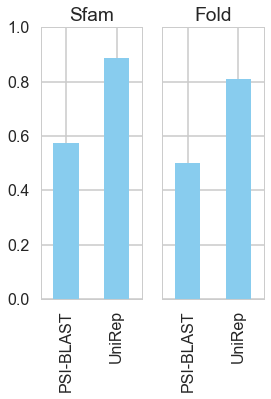

In [14]:
fig = plt.figure(figsize=(4,5))
axs = fig.subplots(1,2)
df.loc[['PSI-BLAST','UniRep'],'ROC'].plot(kind='bar', color=palette[0], ax=axs[0], ylim=(0,1))
df_fold.loc[['PSI-BLAST','UniRep'],'ROC'].plot(kind='bar', color=palette[0], ax=axs[1], sharey=axs[0], ylim=(0,1))
axs[0].set_title('Sfam')
axs[1].set_title('Fold')
#plot_style_utils.save_for_pub(fig=fig, path="./figures/blast", dpi=250)